## Support vector classifier


In [1]:
import pandas as pd
import numpy as np

import os.path

training_data = pd.read_parquet(os.path.join("data", "training.parquet"))

In [2]:
training_data.sample(10)

,Category,Text
6113,rec.sport.hockey,True rumor. Fact! A big three way deal!\n\nE...
14404,sci.electronics,From article <1993Apr27.004240.24401@csi.jpl.n...
8370,sci.med,This is generally called phimosis..usually it ...
14999,talk.politics.guns,In article <1993Apr19.225700.3976@jupiter.sun....
5491,comp.os.ms-windows.misc,\nSerial Printing
6054,rec.sport.hockey,THIS IS WHAT I CAME UP WITH USING THE FINAL RE...
12739,comp.graphics,"\nHello,\n I've been trying to bump map a gif..."
8003,sci.med,\nI may not be the world's greatest expert on ...
10632,rec.motorcycles,For sale 1988 Kawasaki EX-500 with 6682 miles....
11844,comp.windows.x,In article <1993Apr20.105725@narya.gsfc.nasa.g...


In [3]:
import cloudpickle as cp
feature_pipeline = cp.load(open('feature_pipeline.sav', 'rb'))

In [4]:
train_vecs = feature_pipeline.fit_transform(training_data["Text"])

In [5]:
from sklearn import svm

In [6]:
clf = svm.LinearSVC()

In [7]:
clf.fit(train_vecs, training_data["Category"])

LinearSVC()

In [8]:
clf.score(train_vecs, training_data["Category"])

0.9650820965082096

In [9]:
testing_data = pd.read_parquet(os.path.join("data", "testing.parquet"))
testing_vecs=feature_pipeline.transform(testing_data["Text"])
clf.score(testing_vecs, testing_data["Category"])

0.7930399866153589

In [10]:
from mlworkflows import plot

df, chart =plot.confusion_matrix(testing_data["Category"], clf.predict(testing_vecs))

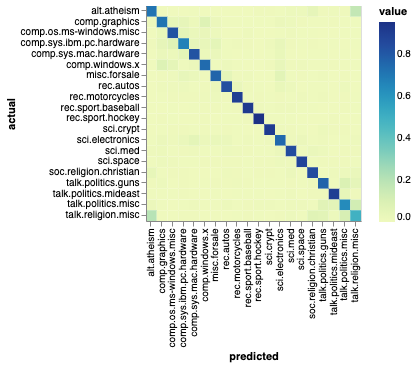

In [11]:
chart

In [12]:
from sklearn.metrics import classification_report
print(classification_report(testing_data["Category"], clf.predict(testing_vecs)))


                          precision    recall  f1-score   support

             alt.atheism       0.69      0.71      0.70       284
           comp.graphics       0.72      0.71      0.72       303
 comp.os.ms-windows.misc       0.76      0.82      0.79       293
comp.sys.ibm.pc.hardware       0.72      0.67      0.69       303
   comp.sys.mac.hardware       0.78      0.82      0.80       286
          comp.windows.x       0.74      0.74      0.74       280
            misc.forsale       0.79      0.76      0.77       305
               rec.autos       0.83      0.84      0.84       300
         rec.motorcycles       0.89      0.90      0.89       317
      rec.sport.baseball       0.91      0.92      0.91       291
        rec.sport.hockey       0.93      0.95      0.94       310
               sci.crypt       0.92      0.91      0.92       303
         sci.electronics       0.70      0.74      0.72       274
                 sci.med       0.84      0.84      0.84       314
         

In [13]:
from mlworkflows import util

util.serialize_to(clf, "model.sav")